# Lab 6
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [82]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


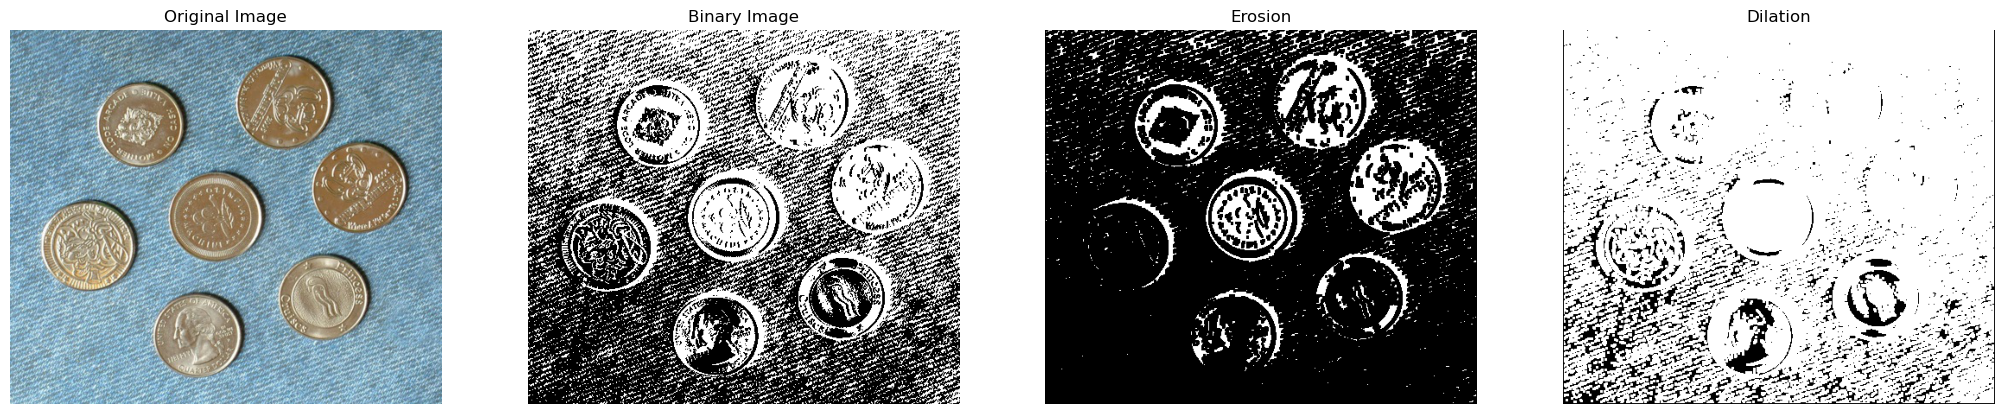

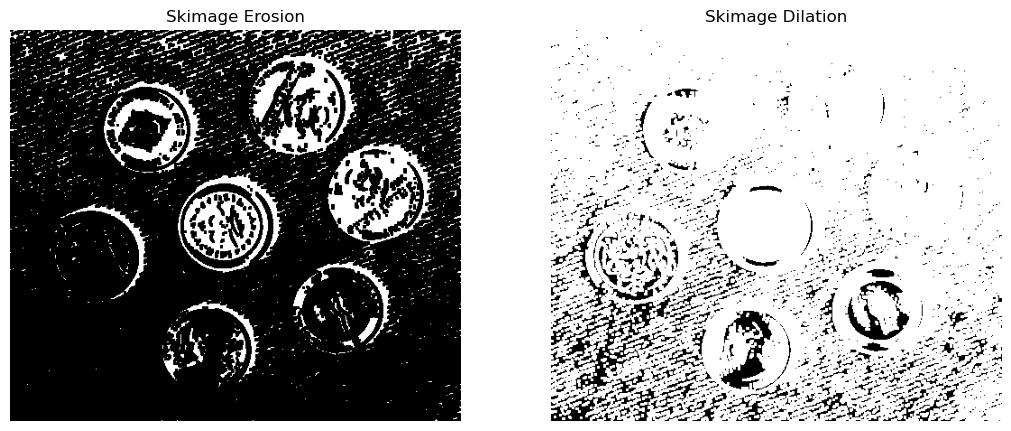

In [93]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

img = (io.imread('./img/coins.jpg'))


# Convert to binary
binary = rgb2gray(img) < np.median(rgb2gray(img))

def erosion(binary_img, window_size):
    # Create a square window
    window = np.ones((window_size, window_size))
    # Apply erosion
    eroded = np.zeros_like(binary_img)
    for i in range(window_size//2, binary_img.shape[0]-window_size//2): 
        for j in range(window_size//2, binary_img.shape[1]-window_size//2):
            eroded[i, j] = np.min(binary_img[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1])
    return eroded

def dilation(binary_img, window_size):
    # Create a square window
    window = np.ones((window_size, window_size))
    # Apply dilation
    dilated = np.zeros_like(binary_img)
    for i in range(window_size//2, binary_img.shape[0]-window_size//2):
        for j in range(window_size//2, binary_img.shape[1]-window_size//2):
            dilated[i, j] = np.max(binary_img[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1])
    return dilated

# Erosion
eroded = erosion(binary, 3) # 3x3 window
# Dilation
dilation = dilation(binary, 3) # 3x3 window

show_images([img,binary,eroded, dilation], ['Original Image','Binary Image','Erosion', 'Dilation'])

ski_erosion =binary_erosion(binary, footprint=np.ones((3,3)))
ski_dilation = binary_dilation(binary, footprint=np.ones((3,3)))
show_images([ski_erosion, ski_dilation], ['Skimage Erosion', 'Skimage Dilation'])



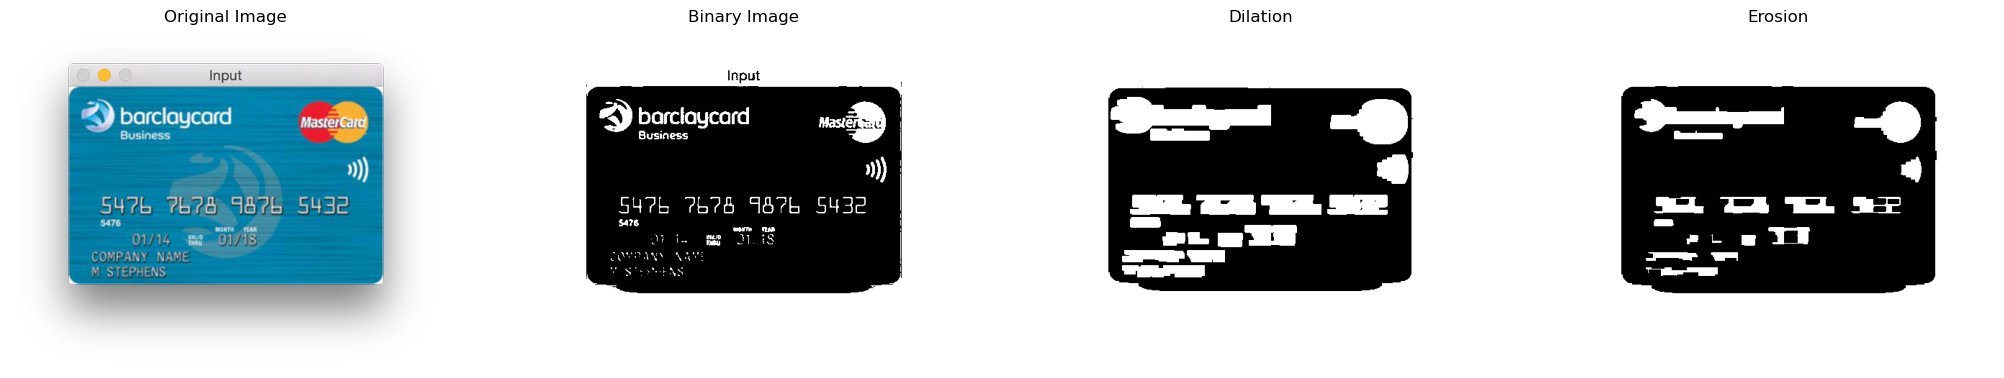

125.8 195.2 231.8 254.2
217.8 285.2 231.8 254.2
307.8 376.2 231.8 254.2
399.8 468.2 231.8 254.2
236.2 264.8 234.2 244.8
125.8 153.2 262.8 272.2
204.8 242.2 308.8 320.2


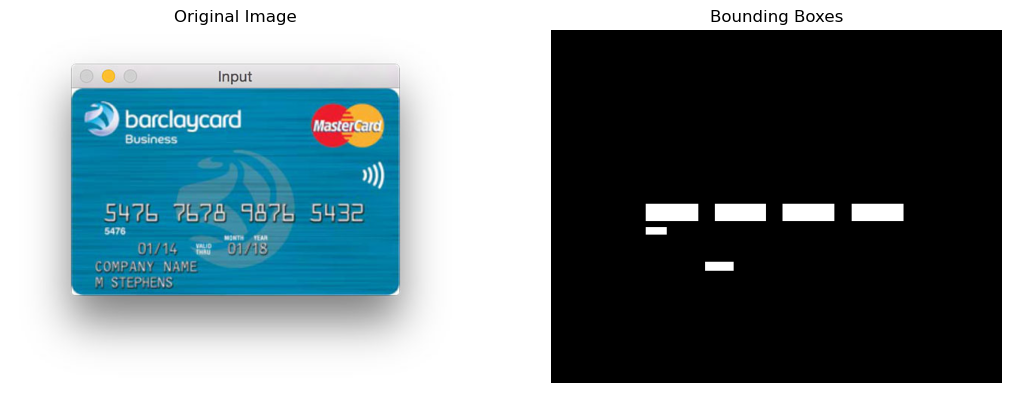

In [84]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
img = (io.imread('./img/card.jpg'))
img_gray = rgb2gray(img)
binary_image = img_gray > np.median(img_gray) -0.2


# Apply closing
# Dilation
dilated_image = binary_dilation(binary_image, footprint=np.ones((6,16))) # 3x3 window
# Erosion
eroded_image =binary_erosion(dilated_image, footprint=np.ones((6,16))) # 3x3 window



show_images([img, binary_image, dilated_image, eroded_image], ['Original Image', 'Binary Image', 'Dilation', 'Erosion'])

# # Find contours
contours = find_contours(eroded_image, 0.8)
bounding_boxes = []
for contour in contours:
    Ymin = np.min(contour[:,0])
    Ymax = np.max(contour[:,0])
    Xmin = np.min(contour[:,1])
    Xmax = np.max(contour[:,1])
    aspect_ratio = (Xmax-Xmin)/(Ymax-Ymin)
    if 2.5 <= aspect_ratio <= 3.5:
        print(Xmin, Xmax, Ymin, Ymax)
        bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])


# #When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
img_with_boxes = np.zeros_like(img_gray)
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
    img_with_boxes[rr, cc] = 1 #set color white

show_images([img, img_with_boxes], ['Original Image', 'Bounding Boxes'])

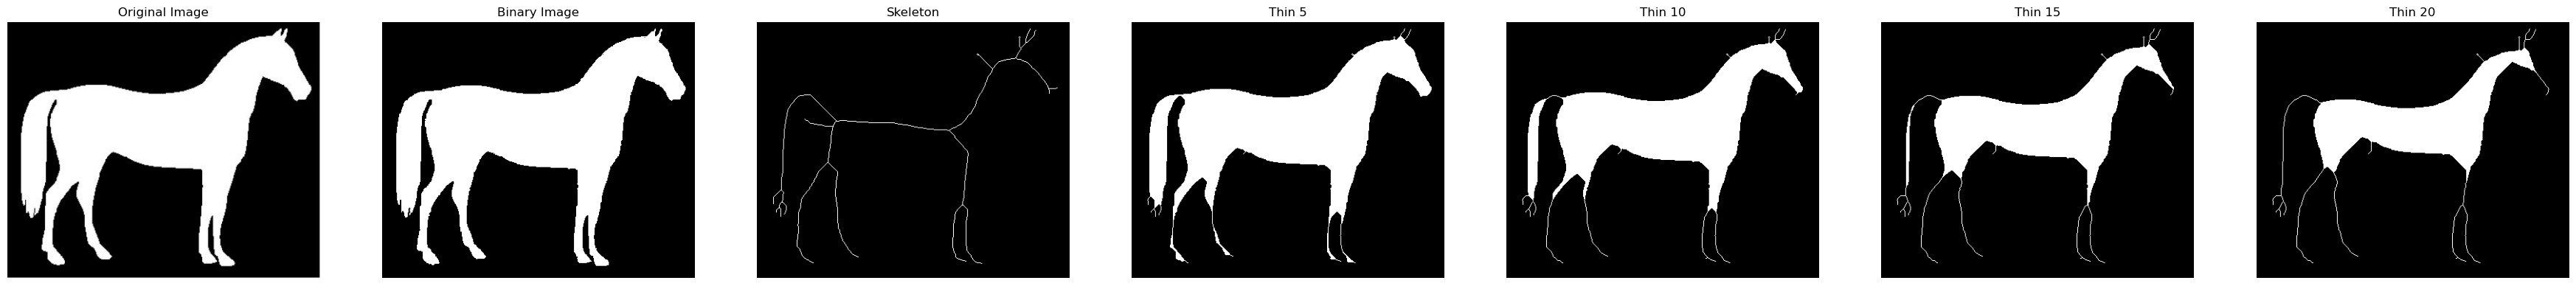

In [92]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''

img = (io.imread('./img/horse.jpg'))
img_gray_x = rgb2gray(img)

# Convert to binary
binary_x = img_gray_x > 0.9

# Skeletonize
skeleton = skeletonize(np.copy(binary_x))

# Thin
thin5 = thin(np.copy(binary_x), max_num_iter=5)
thin10 = thin(np.copy(binary_x), max_num_iter=10)  
thin15 = thin(np.copy(binary_x), max_num_iter=15)
thin20 = thin(np.copy(binary_x), max_num_iter=20)

show_images([img, binary_x, skeleton, thin5, thin10, thin15, thin20], ['Original Image', 'Binary Image', 'Skeleton', 'Thin 5', 'Thin 10', 'Thin 15', 'Thin 20'])